In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 501,
    "ct": 201,
    "dx": 100,
    "dt": 600,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 10,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 10,
}
config.iterations = 10000
config.print_every = 100
config.lr = 1e-3
config.weights = {
	"c1": 1e2,
	"c2": 1e4,
	"d1": 1e2,
	"d2": 1.0,
	"l1": 1e-8,
	"l2": 1e-8,
    "s": 1e-8
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/08, 22:00:24, Iteration: 100, Train Loss: 2.0117e+02, c1: 5.2666e-01, c2: 1.1670e-03, d1: 1.3684e+00, d2: 0.0000e+00, s: 1.4224e-02, l1_reg: 3.1796e+02, l2_reg: 4.9489e+01
2020/09/08, 22:00:24, Iteration: 200, Train Loss: 1.5806e+02, c1: 2.4796e-01, c2: 7.4188e-04, d1: 1.2585e+00, d2: 0.0000e+00, s: 2.0567e-02, l1_reg: 3.1709e+02, l2_reg: 4.9265e+01
2020/09/08, 22:00:25, Iteration: 300, Train Loss: 1.3863e+02, c1: 6.8116e-02, c2: 1.7680e-03, d1: 1.1413e+00, d2: 0.0000e+00, s: 1.4140e-02, l1_reg: 3.1635e+02, l2_reg: 4.9104e+01
2020/09/08, 22:00:26, Iteration: 400, Train Loss: 1.2114e+02, c1: 9.8794e-02, c2: 8.7313e-04, d1: 1.0253e+00, d2: 0.0000e+00, s: 2.4599e-02, l1_reg: 3.1581e+02, l2_reg: 4.8931e+01
2020/09/08, 22:00:27, Iteration: 500, Train Loss: 1.0689e+02, c1: 1.0342e-01, c2: 5.2255e-04, d1: 9.1321e-01, d2: 0.0000e+00, s: 2.9437e-02, l1_reg: 3.1542e+02, l2_reg: 4.8837e+01
2020/09/08, 22:00:28, Iteration: 600, Train Loss: 9.1930e+01, c1: 5.5705e-02, c2: 6.9536e-04, d1: 7.

2020/09/08, 22:01:02, Iteration: 4700, Train Loss: 1.4563e+01, c1: 3.3174e-02, c2: 5.8209e-04, d1: 5.4242e-02, d2: 0.0000e+00, s: 6.6979e-03, l1_reg: 3.2458e+02, l2_reg: 5.7362e+01
2020/09/08, 22:01:03, Iteration: 4800, Train Loss: 1.0249e+01, c1: 9.9031e-03, c2: 3.9142e-04, d1: 5.3442e-02, d2: 0.0000e+00, s: 6.2525e-03, l1_reg: 3.2443e+02, l2_reg: 5.7448e+01
2020/09/08, 22:01:03, Iteration: 4900, Train Loss: 1.4232e+01, c1: 1.5695e-02, c2: 7.4536e-04, d1: 5.2086e-02, d2: 0.0000e+00, s: 6.9547e-03, l1_reg: 3.2450e+02, l2_reg: 5.7651e+01
2020/09/08, 22:01:04, Iteration: 5000, Train Loss: 1.1172e+01, c1: 9.0653e-03, c2: 5.1527e-04, d1: 5.1125e-02, d2: 0.0000e+00, s: 6.5388e-03, l1_reg: 3.2446e+02, l2_reg: 5.7791e+01
2020/09/08, 22:01:05, Iteration: 5100, Train Loss: 1.0927e+01, c1: 1.8649e-02, c2: 4.0126e-04, d1: 5.0496e-02, d2: 0.0000e+00, s: 6.6549e-03, l1_reg: 3.2431e+02, l2_reg: 5.7865e+01
2020/09/08, 22:01:06, Iteration: 5200, Train Loss: 1.3467e+01, c1: 2.3539e-02, c2: 6.1559e-04, 

2020/09/08, 22:01:42, Iteration: 9300, Train Loss: 6.1965e+00, c1: 1.1773e-02, c2: 3.0236e-04, d1: 1.9956e-02, d2: 0.0000e+00, s: 2.7956e-03, l1_reg: 3.2088e+02, l2_reg: 6.6478e+01
2020/09/08, 22:01:43, Iteration: 9400, Train Loss: 8.8951e+00, c1: 5.3509e-03, c2: 6.3870e-04, d1: 1.9731e-02, d2: 0.0000e+00, s: 2.4272e-03, l1_reg: 3.2083e+02, l2_reg: 6.6583e+01
2020/09/08, 22:01:44, Iteration: 9500, Train Loss: 7.3630e+00, c1: 4.1141e-03, c2: 4.9332e-04, d1: 2.0183e-02, d2: 0.0000e+00, s: 2.2886e-03, l1_reg: 3.2073e+02, l2_reg: 6.6663e+01
2020/09/08, 22:01:45, Iteration: 9600, Train Loss: 7.4179e+00, c1: 1.7276e-02, c2: 3.7132e-04, d1: 1.9771e-02, d2: 0.0000e+00, s: 2.3561e-03, l1_reg: 3.2052e+02, l2_reg: 6.6628e+01
2020/09/08, 22:01:46, Iteration: 9700, Train Loss: 6.3728e+00, c1: 6.3556e-03, c2: 3.7742e-04, d1: 1.9630e-02, d2: 0.0000e+00, s: 2.1534e-03, l1_reg: 3.2042e+02, l2_reg: 6.6630e+01
2020/09/08, 22:01:47, Iteration: 9800, Train Loss: 6.9355e+00, c1: 2.0626e-02, c2: 2.8385e-04, 

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [2]:
config.iterations = 100000
config.print_every = 1000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/08, 22:01:58, Iteration: 11000, Train Loss: 7.9659e+00, c1: 2.5234e-02, c2: 3.4725e-04, d1: 1.9700e-02, d2: 0.0000e+00, s: 1.6576e-03, l1_reg: 3.1657e+02, l2_reg: 6.6433e+01
2020/09/08, 22:02:07, Iteration: 12000, Train Loss: 6.1335e+00, c1: 8.3440e-03, c2: 3.2912e-04, d1: 2.0079e-02, d2: 0.0000e+00, s: 1.4402e-03, l1_reg: 3.1561e+02, l2_reg: 6.6545e+01
2020/09/08, 22:02:16, Iteration: 13000, Train Loss: 4.4874e+00, c1: 1.0187e-02, c2: 1.4917e-04, d1: 1.9770e-02, d2: 0.0000e+00, s: 1.4037e-03, l1_reg: 3.1347e+02, l2_reg: 6.6787e+01
2020/09/08, 22:02:25, Iteration: 14000, Train Loss: 4.9124e+00, c1: 8.8751e-03, c2: 2.0697e-04, d1: 1.9553e-02, d2: 0.0000e+00, s: 1.1116e-03, l1_reg: 3.1104e+02, l2_reg: 6.7070e+01
2020/09/08, 22:02:34, Iteration: 15000, Train Loss: 5.6853e+00, c1: 7.4402e-03, c2: 3.0228e-04, d1: 1.9184e-02, d2: 0.0000e+00, s: 1.1481e-03, l1_reg: 3.0828e+02, l2_reg: 6.8236e+01
2020/09/08, 22:02:42, Iteration: 16000, Train Loss: 4.4842e+00, c1: 9.1985e-03, c2: 1.7132

2020/09/08, 22:08:44, Iteration: 57000, Train Loss: 3.6899e+00, c1: 7.1954e-03, c2: 1.2989e-04, d1: 1.6715e-02, d2: 0.0000e+00, s: 1.5156e-09, l1_reg: 1.5665e+02, l2_reg: 9.1268e+01
2020/09/08, 22:08:53, Iteration: 58000, Train Loss: 3.3867e+00, c1: 1.6926e-03, c2: 1.5013e-04, d1: 1.7162e-02, d2: 0.0000e+00, s: 8.9961e-10, l1_reg: 1.5519e+02, l2_reg: 9.1112e+01
2020/09/08, 22:09:02, Iteration: 59000, Train Loss: 3.0775e+00, c1: 3.0762e-03, c2: 1.0642e-04, d1: 1.7057e-02, d2: 0.0000e+00, s: 7.0333e-11, l1_reg: 1.5401e+02, l2_reg: 9.1587e+01
2020/09/08, 22:09:11, Iteration: 60000, Train Loss: 3.4242e+00, c1: 5.6230e-03, c2: 1.2024e-04, d1: 1.6595e-02, d2: 0.0000e+00, s: 4.6859e-12, l1_reg: 1.5523e+02, l2_reg: 9.1084e+01
2020/09/08, 22:09:20, Iteration: 61000, Train Loss: 4.1815e+00, c1: 5.6765e-04, c2: 2.4318e-04, d1: 1.6929e-02, d2: 0.0000e+00, s: 6.8296e-11, l1_reg: 1.5105e+02, l2_reg: 9.1660e+01
2020/09/08, 22:09:29, Iteration: 62000, Train Loss: 3.4241e+00, c1: 3.3388e-03, c2: 1.4217

2020/09/08, 22:15:34, Iteration: 103000, Train Loss: 2.8723e+00, c1: 2.7905e-03, c2: 8.6029e-05, d1: 1.7330e-02, d2: 0.0000e+00, s: 2.2610e-15, l1_reg: 1.1156e+02, l2_reg: 9.6321e+01
2020/09/08, 22:15:43, Iteration: 104000, Train Loss: 5.3564e+00, c1: 2.0635e-03, c2: 3.4922e-04, d1: 1.6579e-02, d2: 0.0000e+00, s: 1.2387e-12, l1_reg: 1.1251e+02, l2_reg: 9.6175e+01
2020/09/08, 22:15:52, Iteration: 105000, Train Loss: 3.1264e+00, c1: 6.9147e-04, c2: 1.3738e-04, d1: 1.6835e-02, d2: 0.0000e+00, s: 5.4502e-09, l1_reg: 1.1462e+02, l2_reg: 9.5720e+01
2020/09/08, 22:16:00, Iteration: 106000, Train Loss: 2.5717e+00, c1: 9.3354e-04, c2: 8.2470e-05, d1: 1.6537e-02, d2: 0.0000e+00, s: 1.1664e-11, l1_reg: 1.1158e+02, l2_reg: 9.6477e+01
2020/09/08, 22:16:09, Iteration: 107000, Train Loss: 3.1812e+00, c1: 2.1122e-03, c2: 1.3207e-04, d1: 1.6493e-02, d2: 0.0000e+00, s: 4.1562e-10, l1_reg: 1.1033e+02, l2_reg: 9.6827e+01
2020/09/08, 22:16:18, Iteration: 108000, Train Loss: 4.4728e+00, c1: 1.3664e-02, c2: 

<IPython.core.display.Javascript object>


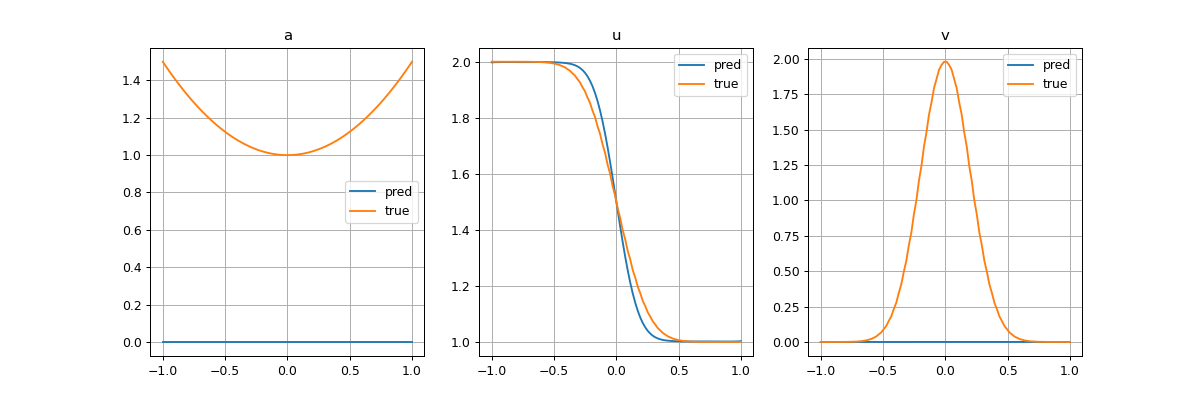

In [3]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: 1+0.5*x**2
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_3_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()